 # -> Nichtlineare finite Elemente <- 
    
    

# A 4.1.1

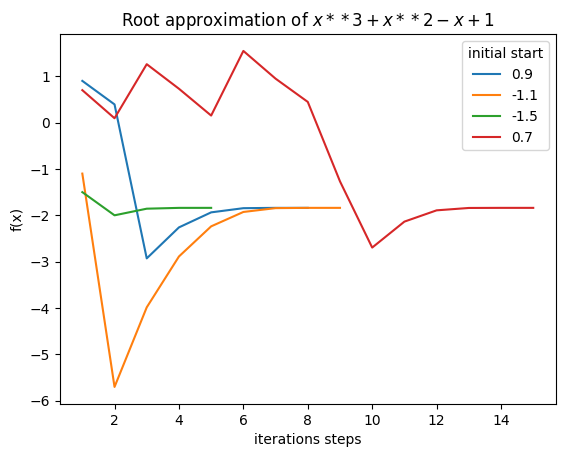

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def newton(fun, x0, jac, liste, tol=0.000001 , maxiter=200, callback=None):
    """Newton's root-finding method.

    This function applies the Newton method to find the root of a scalar function starting from an initial guess.

    Parameters:
    fun : callable(x)
        The function for which the root is to be found.
    x0 : float
        Initial guess for the root.
    jac : callable(f, x)
        Derivative of the function.
    lst : list
        List to store intermediate results.
    tol : float, optional
        Tolerance for convergence to the root.
    maxiter : int, optional
        Maximum number of iterations for the Newton method.
    callback : callable(x, **kwargs), optional
        Callback function to be called at each iteration.

    Returns:
    x : float
        The root found by the Newton method.
    """

    # Check if  function value at  current guess is below Tolerance
    fx0 = fun(x0)
    if abs(fx0) < tol:
        # append the guess to the list and return 
        liste.append(x0)
        return liste

    # If callback ==  None, call  solver_callback function
    if callback:
        callback(x0, maxiter)

    # aappend  current guess to the list
    liste.append(x0)

    # decrease the number of remaining iterations
    maxiter -= 1
    if maxiter == 0:
        raise Exception("Maximal amount of iterations reached")

    # Update the guess and call the Newton method again
    x0 -= fx0 / jac(x0)
    return newton(fun, x0, jac, liste, tol, maxiter, callback)





# callback function for newton
def solver_callback(x, maxiter):
    """Solver callback for logging. 

    This function will print the current solution 'x', its corresponding function value 'f(x)', derivative 'df(x)' and the number of iterations remaining.

    Parameters:
    x : float or np.ndarray
        Current approximate solution
    maxiter : int
        Maximum iterations remaining
    """
   # test= 0
    for i in range(7):
        print("x=",x,  "f(x) =" ,f(x), "df(x)= ", df(x))




# Define function for which the root is to be found
def f(x):
    return  x**3 + x**2 - x + 1

#derivative of the function
def df(x):
    return  3 * x**2 + 2 * x - 1

# Innitial guesses
x_1 = 0.9
x_2 = -1.1
x_3 = -1.5
x_4 = 0.7



# tolerance for convergence root
tol= 0.000001

# Maximum number iterations
maxiter = 200


#print iterations
#solver_callback(x_1, maxiter)


plt.figure()

# Apply "Newton" for each initial guess + plot 
for x0 in [x_1, x_2, x_3, x_4]:
    # get the list of approximate solutions
    solutions = newton(f, x0, df, [], tol, maxiter)
    # Plot convergence of method
    plt.plot(range(1, len(solutions) + 1), solutions)

# set legend, title, and labels
plt.legend([0.9, -1.1, -1.5, 0.7], title="initial start")
plt.title("Root approximation of $x**3 + x**2 - x + 1$")
plt.xlabel("iterations steps")
plt.ylabel("f(x)")

# SHOW plot
plt.show()




Die Nullstelle liegt wie erwartet bei ~ -1.84.

# A 4.4.2


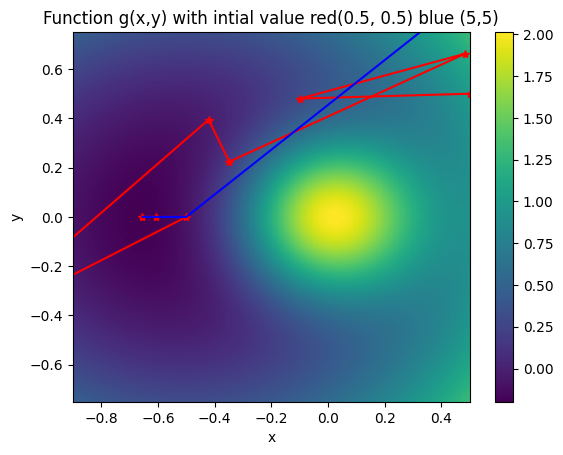

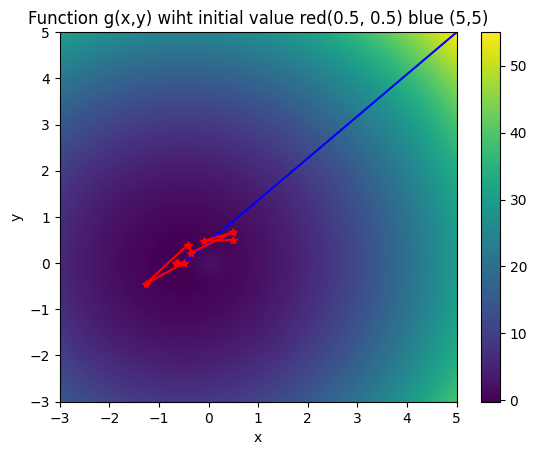

In [5]:


import numpy as np
import matplotlib.pyplot as plt


def g(t):
    x, y = t
    result = 2 * np.exp(-10 * (x ** 2 + y ** 2)) + x ** 2 + y ** 2 + x
    return result

def jacobi(t):
    x, y = t
    result = np.array([-40 * x * np.exp(-10 * (x ** 2 + y ** 2)) + 2 * x + 1,
                      -40 * y * np.exp(-10 * (x ** 2 + y ** 2)) + 2 * y])
    return result

def hesse(t):
    x, y = t
    result = np.array([[800 * (x ** 2) * np.exp(-10 * (x ** 2 + y ** 2)) - 40 * np.exp(-10 * (x ** 2 + y ** 2)) + 2,
                       800 * x * y * np.exp(-10 * (x ** 2 + y ** 2))],
                      [800 * x * y * np.exp(-10 * (x ** 2 + y ** 2)),
                       800 * (y ** 2) * np.exp(-10 * (y ** 2 + x ** 2)) - 40 * np.exp(-10 * (y ** 2 + x ** 2)) + 2]])
    return result



def newton(fun, x0, jacobi, list_1, tol=1e-6, maxiter=200, 
           callback=None): 
    """ 
    Newton solver expects vectorial function fun and scalar 
    vectorial value x0. 
 
    Parameters 
    ---------- 
    fun : callable(x)         vectorial function of a vectorial. 
    x0 : float                     vectorial initial value. 
    jac : callable(f, x)         Jacobi matrix of f at position x. 

    tol : float, optional         Tolerance (with respect to the zero value) for  convergence. 
    
    maxiter : int, optional         Maximum number of Newton iterations. 
    
    callback : callable(x, **kwargs), optional 
        Callback function to handle logging and convergence 
        stats. 
 
    Returns 
    ------- 
    x : float 
        Approximate local root. 
    """

    if maxiter == 0:
        raise Exception("Maximum number of Newton iterations reached.")

    if np.linalg.norm(fun(x0)) < tol:
        return list_1

    list_1.append(x0)
    return newton(fun, x0 + np.linalg.solve(jacobi(x0), -fun(x0)), jacobi, list_1, tol, maxiter - 1, callback)


tol = 1e-2

#neede because of both in one plott
initial_value2 = np.array([5,5])
res2 = newton(jacobi, initial_value2, hesse, [], tol, 1000, False)



# Plot 1
plt.figure()
x, y = np.meshgrid(np.linspace(-1, 0.5, 500), np.linspace(-0.75, 0.75, 500))
Z = g([x, y])
plt.colorbar(plt.pcolormesh(x,y, Z))
initial_value1 = np.array([0.5, 0.5])
res1 = newton(jacobi, initial_value1, hesse, [], tol, 1000, False)

plt.plot([i[0] for i in res1], [i[1] for i in res1], color="red", marker = "*")
plt.plot([i[0] for i in res2], [i[1] for i in res2], color="blue")
plt.title("Function g(x,y) with intial value red(0.5, 0.5) blue (5,5)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.9 ,0.5)
plt.ylim(-0.75,0.75)
plt.show()





# Plot 2
plt.figure()
x, y = np.meshgrid(np.linspace(-3, 5, 1000), np.linspace(-3, 5, 1000))
Z = g([x, y])
plt.colorbar(plt.pcolormesh(x,y, Z))
initial_value2 = np.array([5, 5])
res2 = newton(jacobi, initial_value2, hesse, [], tol, 1000, False)
plt.plot([i[0] for i in res2], [i[1] for i in res2], color="blue")
plt.plot([i[0] for i in res1], [i[1] for i in res1], color="red", marker = "*")
plt.title("Function g(x,y) wiht initial value red(0.5, 0.5) blue (5,5)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-3 ,5)
plt.show()


Extremum wie erwartet bei (x,y)= (- 0.66, 0).



Wir haben bislang über das Newton-Verfahren für die Lösung von gekoppelten nichtlinearen Gleichungen gesprochen. Hier fragen wir nun nach der Minimierung einer Funktion und fordern damit die Lösung eines Optimierungsproblems. Wie passt dies zusammen? $\\ \\ $
-> Wir benötigen das Minimum, dafür benötigen wir die Nullstelle der Ableitung. Wir nutzen dass Newton-Raphson-Verfahren um das Minimum anzunähern. Zu überprüfung schauen wir ob die zweite Ableitung postiv ist.
 $\\ \\ $

Welche spezielle Struktur hat die Jacobi-Matrix für ein Optimierungsproblem?  $\\ $ -> Eine (2x2)matrix, also Quadratische und symmmetrische Jacobimatrix des Gradienten.

 $\\ \\ $
Wie nennt man diese Matrix in diesem Fall auch?
-> tangentenmatrix
 $\\ \\ $
 
Sie müssen sich überlegen, wann die Newton-Iteration abgebrochen wird. Was könnte hier ein vernünftiges Kriterium sein und warum? $\\ $
-> Sobal die euklidische Norm kleiner der gewählten Tolernaz ist, wird diese abgebochen um nicht in einer endlos schleife zu sein.
oder auch nach einer festgelegten Anzahl an Interation abgebrochen.



# A 4.2

# A 4.2.1


Das Residum lautet:


$$
R = \frac{d^2 \Phi}{d x^2} - \text{sinh} \Phi
$$

Durch Mutiplikation mit einer Gewichtsfunktion $v(x)$ bekommen wir das gewichtete Residum.


$$
    (v, R)  =    \int_\Omega v(x) \cdot R dx 
$$

$$
 (v, R)  =  ( \int_\Omega v(x) \cdot  \frac{d^2 \Phi}{d x^2} - \text{sinh} \Phi \space ) dx
$$


$$
 (v, R)   =    \int_\Omega v(x) \cdot \frac{d^2 \Phi}{d x^2}~dx - \int_\Omega v(x) \cdot \text{sinh} \Phi ~dx \\
$$


Partielle Ableitung um die Differnzierbarbeit zu reduzieren.

$$
\frac{\text{d}}{\text{d} x} (a(x) \cdot b(x) ) = \frac{\text{d} }{\text{d} x}a(x)\cdot b(x) + \frac{\text{d} b(x)}{\text{d} x}\cdot a(x) 
$$

$$
\frac{\text{d}}{\text{d} x} (a(x) \cdot b(x)  - \frac{\text{d} a(x)}{\text{d} x} b(x)  = \frac{\text{d}\cdot b(x)}{\text{d} x}\cdot a(x)
$$

Wir Substituiern : $a(x) = v$ und $b(x) = \frac{d\Phi}{dx}$ und setzen in die Poisson Boltzmangleichugn ein:

$$
(v,R) =   v  \frac{d \Phi}{d x} \|_{\partial \Omega} -(\frac{dv}{dx}, \frac{d \Phi}{dx}) - (v, \text{sinh} \Phi)
$$

Mittels Gallerkin Ansatz erhalten wir: $v(x) \approx \varphi_k(x)$ , $\Phi \approx \Phi_N und  \Phi_N = \sum_n a_n \varphi_n$


$$
(\varphi_k, R_N) = \varphi_k  \frac{d \Phi_N}{ dx} |_{\partial \Omega} - (\frac{d\varphi_k}{dx}, \space \frac{d \Phi_N}{ dx}) - (\varphi_k, \text{ sinh} \Phi_N)
$$
wobei $\varphi_k  \frac{d \Phi_N}{ dx} |_{\partial \Omega}$ der Neumann Randbedingung entspricht.





# A4.2.2


-> Die numerische Quadratur des Rediduums 

Skript 14.18. Der nicht linearer Teil des Residiums wird mit der Gauß-Quadratur angenähert.

$$
(\varphi_k, \text{sinh} \Phi_N) = \sum_{ei}\frac{\Delta x^{(e)}}{2} \cdot w_i^Q \cdot \varphi_k \cdot (x_i^{(e)})\text{sinh}\cdot \Phi_N(x_i^{(e)})
$$

$ i $ = Quatraturpunkt ,$ w_i^Q$ = Gewichtung , $(x_i^{(e)}$ = Quadraturpunkt im Element 

wendet man die Quadatur nun an erhält man :


$$
R_k  =[\varphi_k(x) \cdot \frac{\text{d} \Phi_N}{\text{d} x} ]_{\partial \Omega} - \sum_n a_n \cdot (\frac{\text{d} \varphi_k(x)}{\text{d} x}, \frac{\text{d} \varphi_n(x)}{\text{d} x} - \sum_{ei} 0.5 \cdot \Delta x^{(e)}w_i^Q  \cdot \varphi_k(x_i^{(e)})\cdot  \sinh
$$
Wobei der erste Teil $\space [\varphi_k(x) \cdot \frac{\text{d} \Phi_N}{\text{d} x} ]_{\partial \Omega}$ vernachlässigt werden kann. 

Und er zweite Teil , $\sum_n a_n \cdot (\frac{\text{d} \varphi_k(x)}{\text{d} x}, \frac{\text{d} \varphi_n(x)}{\text{d} x} $ die Laplace matrix darstellt.

Somit erhalten wir :
$$
R_k   = -L_{kn} \cdot a_n - \sum_{ei} \frac{\Delta x^{(e)}}{2}w_i^Q \cdot \varphi_k(x_i^{(e)}) \cdot \sinh\Phi_N \space(x_i^{(e)})
$$

# A 4.2.3


Zur Berstimmunng der Tangentenmatrix ,
wird die Formel aus 4.4.2 um einen Referenzpunkt $a_n$ linarisiert.
Damit erhalten wir:


$$
\frac{\partial R_k}{\partial a_n}|_{a_n} = - L_{kn} - \sum_{ei}\frac{\Delta x_i^{(e)}}{2} \cdot w_i^Q \varphi_k(x_i^{(e)}) \cdot \varphi_n(x_i^{(e)}) \cosh(\Phi_N(x_i^{(e)}))|_{a_n}
$$
$$
 K  = -L -M = - (L + M)
$$
$K$ entspricht der Tangeneten Matrix. Bei der Lineaisierten Betrachtung muss die Summe aus Laplace Marix und Masse Matrix berücksichtigt werden.
Masse-Matrix ist abhängig vom Zustand des Newton-Lösers (cosh um 𝑥=0 zur 1) diese Anpassung füht zum selben Ergebnis, als ob das Residuum von Anfang an linearisiert worden wäre.


# A 4.2.4

In [7]:
import numpy as np

# nb_quad has the be 2!

def residual(potential_g, potential_left=0, potential_right=0, dx=1, nb_quad=2, linear=False):
    """ 
    Assemble global residual vector for a specific potential.
    ...
    """
    n = len(potential_g)
    residual_g = np.zeros_like(potential_g)

    mass = np.zeros((n, n))#given page 114
    if linear:
        mass =  dx * dx / 24 * np.array([[2, 1, 1],
                                         [1, 2, 1],
                                         [1, 1, 2]])

    # boundary conditions
    residual_g[0] = potential_g[0] - potential_left
    residual_g[-1] = potential_g[-1] - potential_right

    # calculate residuals for interior nodes using slicing
    residual_g[1:-1] = dx / 2 * ((potential_g[2:] + potential_g[1:-1]) / 2 * (1 / 3 + 1 / 6) +
                                  (potential_g[1:-1] + potential_g[:-2]) / 2 * (1 / 3 + 0 / 6))
    
    residual_g[1:-1] += dx / 2 * ((potential_g[2:] + potential_g[1:-1]) / 2 * (1 / 3 + 2 / 6) +
                                   (potential_g[1:-1] + potential_g[:-2]) / 2 * (1 / 3 + 1 / 6))

    if linear:
        residual_g = np.dot(mass, residual_g)

    return residual_g






In [8]:
def tangent(potential_g, potential_left=0, potential_right=0, dx=1, nb_quad=2, linear=False): 
""" 
35    Assemble global tangent matrix for a specific potential. 
36 
37    Parameters 
38    ---------- 
39    potential_g : np.ndarray 
40        Current potential on the nodes (the expansion 
41        coefficients); the length of the array is the number 
42        of nodes 
43    potential_left : float 
44        Left Dirichlet boundary condition. 
45    potential_right : float 
46        Right Dirichlet boundary condition. 
47    dx : float, optional 
48        Grid spacing. (Default: 1) 
49    nb_quad : int, optional 
50        Number of quadrature points. (Default: 2) 
51    linear : bool, optional 
52        Linearize mass matrix. (Default: False) 
53 
54    Returns 
55    ------- 
56    tangent_gg : np.ndarray 
57        Tangent matrix (quadratic, number of rows and columns 
58        equal number of nodes) 
59    """ 




IndentationError: expected an indented block after function definition on line 1 (3808489129.py, line 2)

In [9]:
def check_tangent(value_g, residual_fun, tangent_fun,eps=1e-6): 
""" 
4    Check that tangent_fun is gives the derivative_fun 
5    using finite differences. 
6 
7    Parameters 
8    ---------- 
9    value_g : numpy.nd_array 
10        Nodal value for which to check the derivative 
11    residual_fun : callable 
12        Function that takes the values and returns an array 
13        of residual values 
14    tangent_fun : callable 
15        Function that takes the values and return the 
16        tangent/jacobian matrix 
17    eps : float, optional 
18        Finite difference used for numeric computation of 
19        the derivative (Default: 1e-6) 
20    """ 
'''
21    nb_nodes = len(value_g) 
22    tangent_gg = tangent_fun(value_g) 
23    numeric_tangent_gg = np.zeros_like(tangent_gg) 
24    for i in range(nb_nodes): 
25        _value_g = value_g.copy() 
26        _value_g[i] += eps 
27        residual_plus_g = residual_fun(_value_g) 
28        _value_g[i] -= 2 * eps 
29        residual_minus_g = residual_fun(_value_g) 
30        numeric_tangent_gg[:, i] = ( 
31            residual_plus_g - residual_minus_g 
32            ) / (2 * eps) 
33    np.testing.assert_array_almost_equal( 
34        tangent_gg, numeric_tangent_gg) 
35 
36 
37# Check if tangent is implemented correctly 
38for i in range(10): 
39    check_tangent(np.random.random(21)-0.5, residual, tangent)
'''

IndentationError: expected an indented block after function definition on line 1 (3861931371.py, line 2)